# Tema 2. Problema 1

Dada la función $f(x)=e^{-x}\cdot cos(x^2/\pi)$, calcular la expresión del polinomio que interpola a la función $f$ en cinco puntos $x_i$ equiespaciados en el intervalo $[-2,2]$.

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

In [2]:
f = lambda x: np.exp(-x)*np.cos(x*x/pi)

a, b = -2, 2
n_puntos = 5 # Nº de puntos de interpolación

x = np.linspace(a, b, n_puntos) # Array de n_puntos equiespaciados en [a, b]
y = f(x)

print("x =", x)
print("y =", y)

x = [-2. -1.  0.  1.  2.]
y = [2.16636212 2.58173089 1.         0.34939928 0.03967831]


En el paquete `scipy.interpolate` contamos con una gran variedad de
funciones predefinidas que implementan algoritmos de interpolación
(ver el [manual de
referencia](http://docs.scipy.org/doc/scipy/reference/interpolate.html)
o
[este tutorial](http://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)). Entre
ellos, se encuentra la interpolación de Lagrange, que podemos usar de
la siguiente forma:

In [3]:
# Cargamos la función de interpolación de Lagrange, contenida en scipy.interpolate
from scipy.interpolate import lagrange 

p = lagrange(x, y) # Pol. de interpol. de Lagrange en nodos (x_i, y_i)
p

poly1d([-0.14660334,  0.19483162,  0.61216843, -1.31099742,  1.        ])

#### Observaciones:

- Como se puede observar, la función `lagrange()` devuelve un objeto de tipo `poly1d` (polinomio 1d, o sea con una única incógnita x). Estos objetos están definidos por los coeficientes del polinomio (siendo el primero el término de mayor grado y el último el término independiente). 

- Como vemos seguidamente, podemos imprimirlo, obteniendo una representación "más bonita" del polinomio, así comprobamos que tiene grado $n=4$ (como esperamos al interpolar en 5 puntos).  Para más información sobre polinomios 1d, [consultar el manual](http://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html).

         4          3          2
-0.1466 x + 0.1948 x + 0.6122 x - 1.311 x + 1

Comprobamos que $p$ interpola los valores $(x_i,y_i)$:

  i = 0,  x_i = -2.000000,  y_i-p(x_i) = 4.44089e-16
  i = 1,  x_i = -1.000000,  y_i-p(x_i) = 0
  i = 2,  x_i = 0.000000,  y_i-p(x_i) = 0
  i = 3,  x_i = 1.000000,  y_i-p(x_i) = -1.66533e-16
  i = 4,  x_i = 2.000000,  y_i-p(x_i) = -2.08167e-16
Gráfica de p:


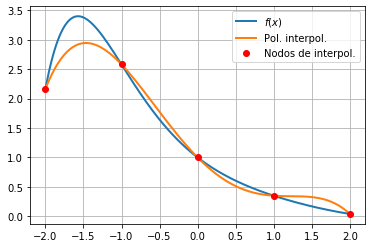

In [4]:
print(p)
print()
print("Comprobamos que $p$ interpola los valores $(x_i,y_i)$:\n")
for i in range(n_puntos):
    print ("  i = %i,  x_i = %f,  y_i-p(x_i) = %g" % (i, x[i], y[i] - p( x[i] ) ))
    
print ("Gráfica de p:")

xx = np.linspace(a, b, 200) # Partición fina (200 puntos entre a y b)
plt.plot(xx, f(xx), label="$f(x)$", lw=2)
plt.plot(xx, p(xx), label="Pol. interpol.", lw=2)
plt.plot(x, y, 'o', label="Nodos de interpol.", c="red")
plt.grid()
plt.legend()

#### Gráfica del error de interpolación (para la "partición fina" xx)

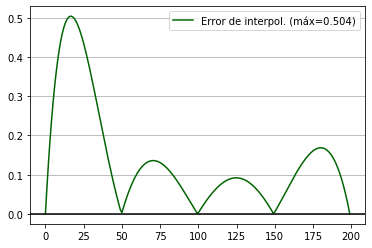

In [5]:
errores_xx = abs(f(xx)-p(xx)) # Array de errores
max_err = max(errores_xx)
etiqueta_error = f"Error de interpol. (máx={max_err:0.3})"
plt.plot(errores_xx, c="darkgreen", label=etiqueta_error)
plt.axhline(c="black")  # Eje horizontal (OX)
plt.legend()
plt.grid(axis='y')

#### Función que representa el polinomio de interpolación

En esta función resumimos todo lo anterior: representamos la gráfica de $f(x)$ junto a su polinomio de interpolación y (una aproximación a) el error en norma infinito

In [6]:
def plot_interpol(f,  x, plot_error=False):
    """
    Dibuja una función f(x) y su polinomio de interpolación
    en el soporte x.
    Si plot_error==True, dibuja el máximo error (una aproximación)
    """
    a, b = x[0], x[-1]
    xx = np.linspace(a, b, num=200)
    plt.plot(xx, f(xx), label="$f(x)$")
    plt.plot(x, f(x), "o", color="red", label="Nodos")
    
    y = f(x)  # Array que resulta de aplicar f a cada elmento de x
    from scipy.interpolate import lagrange
    p = lagrange(x, y)
    plt.plot(xx, p(xx), label="Polinomio de interpol.")

    if plot_error:
        errores_xx = abs(f(xx)-p(xx))  # Lista de errores
        #plot(xx, errores_xx, "--", color="yellow")
        ie = np.argmax(errores_xx) # Índice donde está el máx error
        xe = xx[ie] # Abscisa correspondiente
        plt.plot([xe, xe], [f(xe), p(xe)], "--o",
            label="Error de interpol.")
        
    plt.legend()
    plt.grid()
    

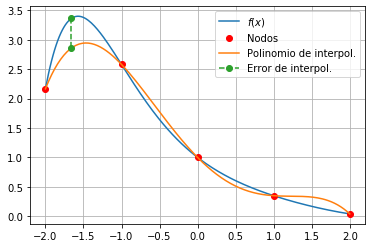

In [7]:
plot_interpol(f, x, plot_error=True)